# Exercise 01: Line chart with styles

Подключаемся к базе данных

In [6]:
import pandas as pd
import sqlite3


connection = sqlite3.connect("../data/checking-logs.sqlite" )

Выполняем запрос, который получает дату и время из таблицы `pageviews` и комиты из `checker`, выбирая только пользователей, а не администраторов.

In [7]:
query_views = """
SELECT DATE(datetime) AS date, COUNT(*) AS views
FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY DATE(datetime)
"""
query_commits = """
SELECT DATE(timestamp) AS date, COUNT(*) AS commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY DATE(timestamp)
"""


views = pd.io.sql.read_sql(query_views, connection)
commits = pd.io.sql.read_sql(query_commits, connection)

С помощью Pandas создаём новый фрейм данных, в котором будут подсчитаны views и commits и сгруппированы по датам.

In [8]:
merged = pd.merge(views, commits, on='date', how='inner')

merged['date'] = pd.to_datetime(merged['date'])
merged = merged.sort_values('date').reset_index(drop=True)

merged.count()

date       32
views      32
commits    32
dtype: int64

С помощью метода .plot() в Pandas создаём график

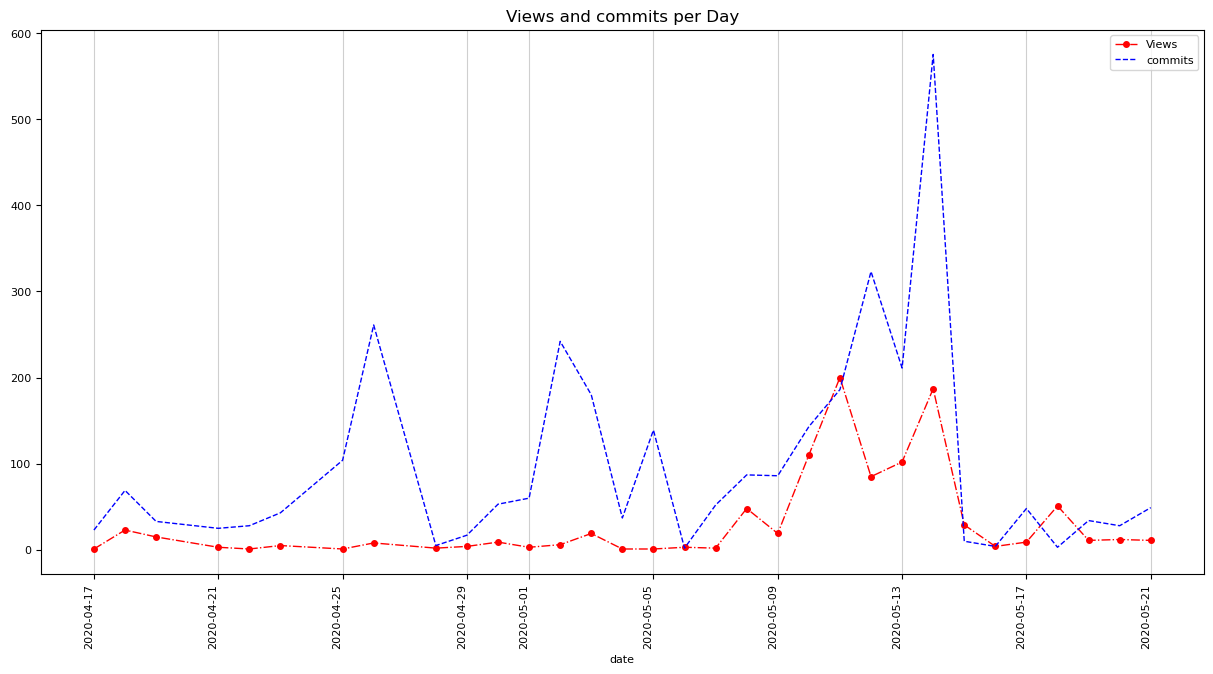

In [9]:
ax = merged.plot(
    x='date',
    y=['views', 'commits'],
    kind='line',
    figsize=(15, 8),
    title='Views and commits per Day',
    fontsize=8,
    rot=90,
    style=['ro-.', 'b--'], 
    linewidth=1,
    markersize=4
)

# ax.axhline(y=150, color='black', linestyle='--', linewidth=1)
ax.set_xlabel("date", fontsize=8)
ax.legend(['Views',  'commits'], fontsize=8, loc='upper right')
ax.grid(True, axis="x" ,linestyle='-', alpha=0.6)

Закрываем соединение с базой данных

In [10]:
connection.close()

Сколько раз количество просмотров превышало 150?

Ответ — 2